# **Comparison of all Model**

**1. Gradient Boosting (Final)**

- Test Accuracy: 0.378 → best among your models.
- Test Log Loss: 1.18 → still very high.
- Precision/Recall/F1: ~0.35–0.43 across classes → no class really stands out.
- Takeaway: GB performs slightly better than the rest on accuracy, but model is weak overall.

**2. Random Forest (After Feature Selection)**

- Test Accuracy: 0.32
- Precision/Recall/F1: class 0 is best (~0.38–0.41), classes 1 & 2 are worse (~0.28–0.30).
- Confusion matrix shows heavy misclassification.
- Takeaway: Feature selection hurt RF more than helped. Model is overfitting slightly but still poor on test.

**3. Gradient Boosting with Cross-Validation / Hyperparameter Tuning**

- Test Accuracy: 0.33–0.36 depending on variant
- Test Log Loss: ~1.11–1.10
- Train Accuracy: 0.92 (balanced) → huge overfitting
- Confusion Matrix: model predicts class 0 better, fails badly for class 2.
- Takeaway: Overfitting is extreme. Hyperparameter tuning didn’t generalize well to test set.

**4. XGBoost**

- Test Accuracy: 0.3576
- Test Log Loss: 1.098 → lowest among all
- Class 0 recall is 0.81, class 2 recall is 0.03 → model is extremely biased towards class 0.
- Train Accuracy: 0.3876 → low, meaning underfitting on train but biased predictions on test.
- Takeaway: Best log loss but poor class balance → strong bias to majority class or easier-to-predict class.

**5. Logistic Regression**

- Test Accuracy: 0.347
- Test F1: 0.35 → low, balanced across classes
- Train Accuracy: 0.387 → model barely learned anything
- Takeaway: Baseline model. Linear assumption too weak for this dataset.


### **Summary / Insights**

- **Accuracy-wise**: GB final > XGBoost > LR > RF
- **Log Loss-wise**: XGBoost (1.098) < GB tuned (1.11) < GB final (1.18)
- **Class Imbalance / Bias**:
    - XGBoost favors class 0 massively
    - GB and RF are more balanced but low performance
    - LR is uniform but underfit

- **Overfitting**:
    - GB tuned has train accuracy 0.92 vs test 0.33 → huge overfit
    - RF after selection → moderate overfit
    - XGBoost → slightly underfit, but test is skewed

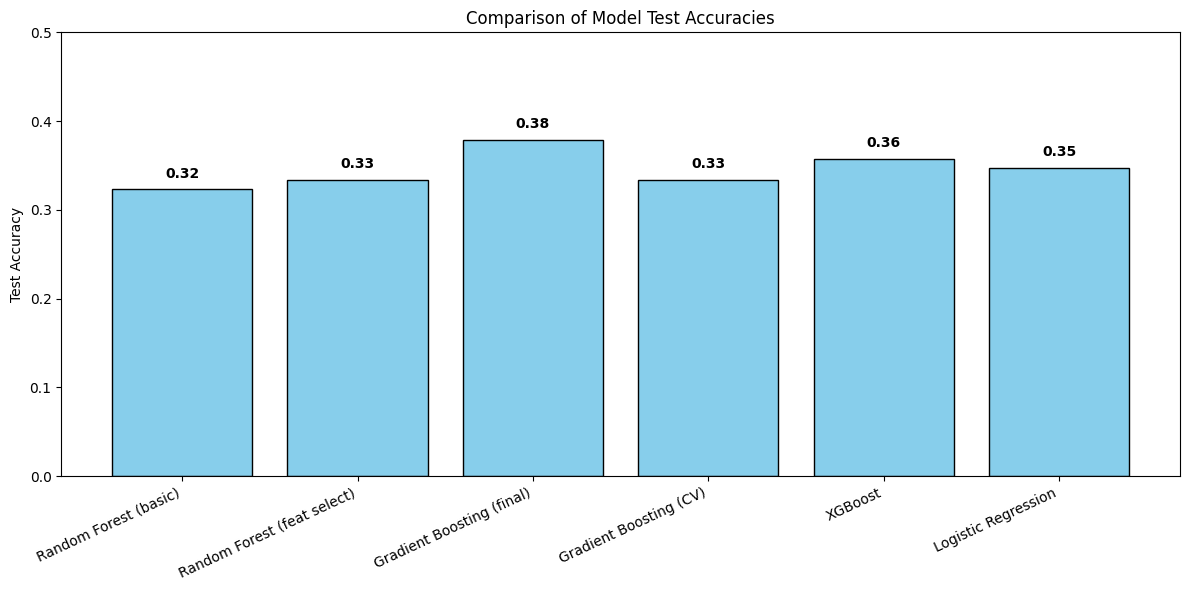

In [1]:
import matplotlib.pyplot as plt

# Model names
models = [
    "Random Forest (basic)",
    "Random Forest (feat select)",
    "Gradient Boosting (final)",
    "Gradient Boosting (CV)",
    "XGBoost",
    "Logistic Regression"
]

# Test accuracies from your outputs
accuracies = [
    0.3229,  # Random Forest basic
    0.3333,  # Random Forest with feature selection
    0.3785,  # Gradient Boosting final
    0.3333,  # Gradient Boosting with CV
    0.3576,  # XGBoost tuned
    0.3472   # Logistic Regression
]

# Plot
plt.figure(figsize=(12,6))
bars = plt.bar(models, accuracies, color="skyblue", edgecolor="black")
plt.ylabel("Test Accuracy")
plt.title("Comparison of Model Test Accuracies")
plt.xticks(rotation=25, ha="right")
plt.ylim(0, 0.5)

# Add accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{acc:.2f}", 
             ha="center", va="bottom", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### What the chart says

- Random Forest (basic): ~0.32

- Random Forest (feat select): ~0.33 (tiny bump after feature selection, not much impact)

- Gradient Boosting (final): ~0.38 (the best performer here)

- Gradient Boosting (CV): ~0.33 (cross-validation version didn’t generalize better, actually dropped)

- XGBoost: ~0.36 (second-best, very close to Gradient Boosting final)

- Logistic Regression: ~0.35 (better than basic RF, but below boosting methods)